In [1]:
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [62]:
features['activity'].value_counts()

activity
0    87400
1    69000
Name: count, dtype: int64

In [75]:
features

,ADX_y_acc_mean,MMA_y_acc_mean,acc_roll,activity
0,-257.4,-993.9,-1.435913,0
1,-265.5,-1014.9,-1.511209,0
2,-284.4,-1093.7,-1.523095,0
3,-260.8,-1014.6,-1.561578,0
4,-241.0,-929.2,-1.478345,0
...,...,...,...,...
156395,-153.3,-578.0,-0.785857,1
156396,-48.0,-160.8,-0.174169,1
156397,-103.6,-379.0,-0.413604,1
156398,-75.6,-260.5,-0.316906,1


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(features, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((140760, 4), (15640, 4))

In [77]:
X_test['activity'].value_counts()

activity
0    8610
1    7030
Name: count, dtype: int64

In [78]:
# Normal = 0 Fall = 1
normal = X_train[X_train['activity'] == 0]
normal.shape

(78790, 4)

In [79]:
fall = X_train[X_train['activity'] == 1]
fall.shape

(61970, 4)

In [80]:
normal.shape

(78790, 4)

# CHECK POINT

In [81]:
X_train_normal, X_val_normal = train_test_split(normal, test_size=0.1, random_state=42)
X_train_normal.shape, X_val_normal.shape

((70911, 4), (7879, 4))

In [82]:
#X_train = X_train[X_train.label == 1]
X_train_normal_train = X_train_normal.drop(['activity'], axis=1)

#X_val = X_val[X_val.label == 1]
X_val_normal_train = X_val_normal.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train_ft = X_train_normal_train.values
X_val_ft = X_val_normal_train.values
X_test = X_test.values

In [84]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_ft)
scaler.fit(X_val_ft)
scaler.fit(X_test)

X_train_ft = scaler.transform(X_train_ft)
X_val_ft = scaler.transform(X_val_ft)
X_test = scaler.transform(X_test)


In [85]:
#reshape inputs for LSTM [samples, timesteps, features]

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", X_train_ft.shape)

X_val_ft = X_val_ft.reshape(X_val_ft.shape[0], 1, X_val_ft.shape[1])
print("Validation data shape:", X_val_ft.shape)

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (70911, 1, 3)
Validation data shape: (7879, 1, 3)
Test data shape: (15640, 1, 3)


In [86]:
"""

X_train_fft = np.fft.fft(X_train_ft)
spectrum = np.fft.fft(X_train_fft)
X_train_ft2 = np.square(np.abs(spectrum))

X_val_fft = np.fft.fft(X_train_ft)
spectrum = np.fft.fft(X_val_fft)
X_val_ft2 = np.square(np.abs(spectrum))

X_test_fft = fft = np.fft.fft(X_test)
spectrum = np.fft.fft(X_test_fft)
X_test2 = np.square(np.abs(spectrum))
"""

'\n\nX_train_fft = np.fft.fft(X_train_ft)\nspectrum = np.fft.fft(X_train_fft)\nX_train_ft2 = np.square(np.abs(spectrum))\n\nX_val_fft = np.fft.fft(X_train_ft)\nspectrum = np.fft.fft(X_val_fft)\nX_val_ft2 = np.square(np.abs(spectrum))\n\nX_test_fft = fft = np.fft.fft(X_test)\nspectrum = np.fft.fft(X_test_fft)\nX_test2 = np.square(np.abs(spectrum))\n'

In [87]:
X_train_ft.shape, X_val_ft.shape, X_test.shape

((70911, 1, 3), (7879, 1, 3), (15640, 1, 3))

In [88]:
X_train_ft.shape[1]

1

In [89]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [90]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [91]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [92]:
#create the autoencoder model

model = autoencoder_model(X_train_ft)
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1280      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 4)              0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [93]:
# fit the model to the data
nb_epochs = 10
batch_size = 10
history = model.fit(X_train_ft, X_train_ft, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Train on 67365 samples, validate on 3546 samples
Epoch 1/10
67330/67365 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9712

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


67365/67365 [==============================] - 15s 226us/sample - loss: 0.0186 - acc: 0.9712 - val_loss: 0.0093 - val_acc: 0.9992
Epoch 2/10
67365/67365 [==============================] - 15s 217us/sample - loss: 0.0059 - acc: 0.9985 - val_loss: 0.0031 - val_acc: 0.9989
Epoch 3/10
67365/67365 [==============================] - 15s 216us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0024 - val_acc: 0.9997
Epoch 4/10
67365/67365 [==============================] - 16s 236us/sample - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 5/10
67365/67365 [==============================] - 15s 228us/sample - loss: 0.0027 - acc: 0.9993 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 6/10
67365/67365 [==============================] - 14s 210us/sample - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 7/10
67365/67365 [==============================] - 14s 203us/sample - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 8/10
67365/67365 [

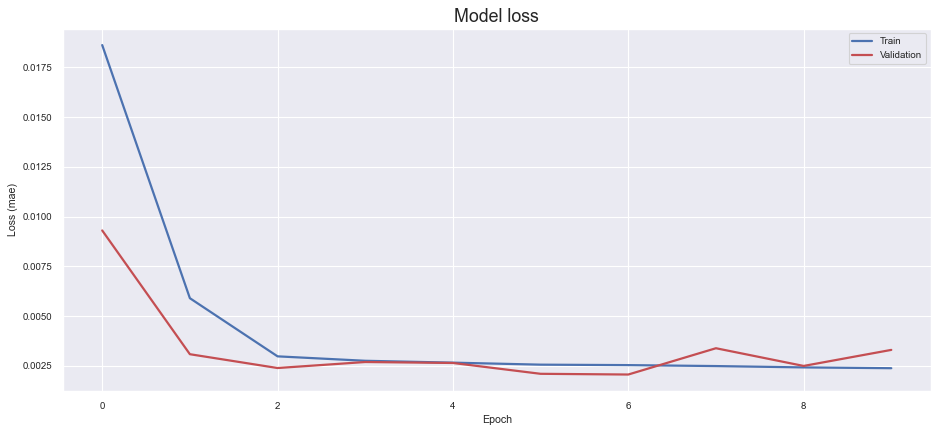

In [94]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [95]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [96]:
valid_x_predictions = model.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [97]:
error_df

,reconstruction_error,true_class
0,0.000007,1
1,0.000006,0
2,0.000012,1
3,0.000013,0
4,0.000036,0
...,...,...
15635,0.000045,1
15636,0.000007,1
15637,0.000009,0
15638,0.000018,1


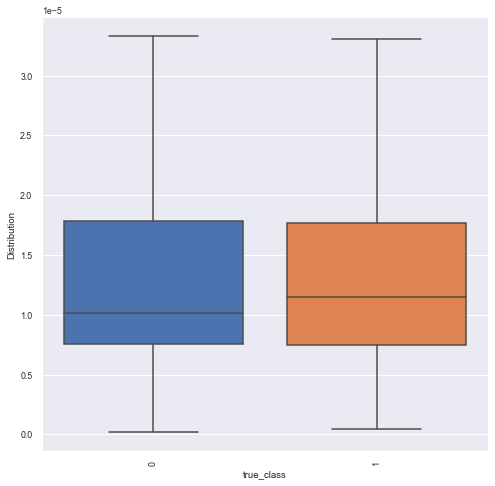

In [98]:
# TEST CODE 1

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False, saturation=1)
plt.ylabel('Distribution')

#plt.axhline(y= 0.003, xmin=0.0, xmax=1,dashes=(5,5), c='g')

plt.xticks(rotation=90)
plt.show()

In [99]:
threshold = 0.0001

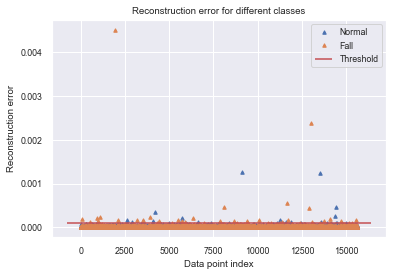

In [100]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [101]:
error_df['true_class'].value_counts()

true_class
0    8610
1    7030
Name: count, dtype: int64

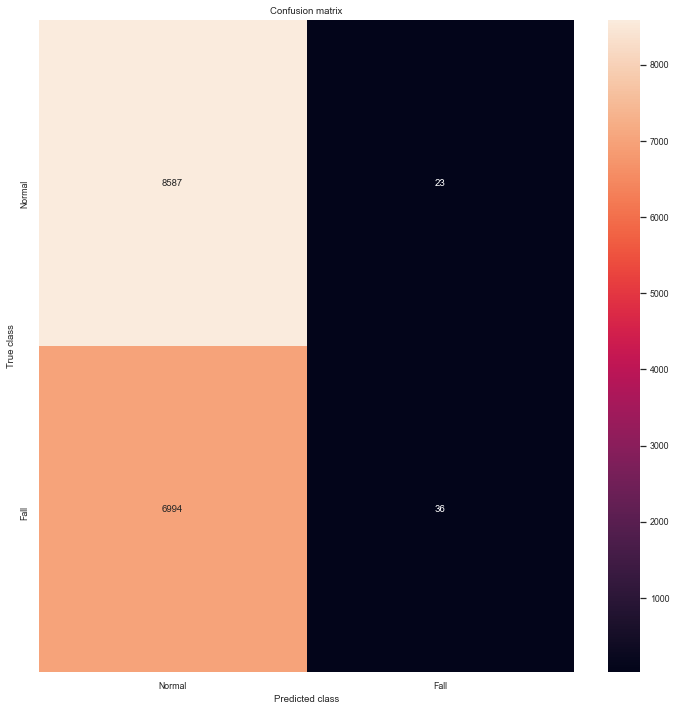

In [102]:
LABELS = ["Normal", "Fall"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [103]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.5513427109974425
Precision : 0.6101694915254238
Recall : 0.005120910384068279
F1 : 0.010156580617858657
